VAMOS A REALIZAR AHORA EL EJERCICIO QUE NOS DIGA QUIÉN ES QUIÉN 

Primero creamos una carpeta con fotos, unas cuantas en train y otras en val 

In [3]:
# EN BASE A UNA CARA TE DA LOS PUNTOS CARACTERÍSTICOS DE DICHA CARA

# example of loading the keras facenet model
from keras.models import load_model
# load the model
model = load_model('./model/facenet_keras.h5')
# summarize input and output shape
print(model.inputs)
#model.summary() 
print(model.outputs)
# Vemos como hay que meter una imagen de 160x160

[<tf.Tensor 'input_1_2:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm_1/cond/Identity:0' shape=(None, 128) dtype=float32>]


C:\Users\sandr\AppData\Roaming\Python\Python37\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [2]:
# face detection for the 5 Celebrity Faces Dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN
 
    # VAMOS POR LAS DIFERENTES CARPETAS EXTRAYENDO LAS CARAS de todas las imagenes de un subdirectorio
    
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)): 
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = MTCNN() # Aplica el detector a la foto directa, antes del resize
    # detect faces in the image
    results = detector.detect_faces(pixels)
    print("[INFO] Faces ", len(results))
    if len(results)>0: 
        # extract the bounding box from the first face
        
        j = 0
        i = 0
        for result in results: 
            if results[j]['box'][2] < result['box'][2]:
                j=i
            i += 1
        x1, y1, width, height = results[j]['box'] # Solo coge una cara
        
        # bug fix
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        # extract the face
        face = pixels[y1:y2, x1:x2]
        # resize pixels to the model size
        image = Image.fromarray(face)
        image = image.resize(required_size)
        face_array = asarray(image)
    else:
        face_array = []
    return face_array
 
# load images and extract faces for all images in a directory
def load_faces(directory):
    faces = list()
    # enumerate files
    for filename in listdir(directory):
        # path
        path = directory + filename
        print("[INFO] Path: ", path)
        # get face
        face = extract_face(path)
        # store
        if len(face)>0:
            faces.append(face)
    return faces
 
# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
    X, y = list(), list()
    # enumerate folders, on per class
    for subdir in listdir(directory):
        # path
        path = directory + subdir + '/'
        print("[INFO] Path: ", path)
        # skip any files that might be in the dir
        if not isdir(path):
            continue
        # load all faces in the subdirectory
        faces = load_faces(path)
        # create labels
        labels = [subdir for _ in range(len(faces))]
        # summarize progress
        print('>loaded %d examples for class: %s' % (len(faces), subdir))
        # store
        X.extend(faces)
        y.extend(labels) # Generas un label de quién es esa cara
    return asarray(X), asarray(y)
 
# load train dataset
trainX, trainy = load_dataset('faces_clase/train/') 
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('faces_clase/val/')
# save arrays to one file in compressed format
savez_compressed('faces_clase-dataset.npz', trainX, trainy, testX, testy)

[INFO] Path:  faces_clase/train/Araya/
[INFO] Path:  faces_clase/train/Araya/20191231_115955.jpg
[INFO] Path:  faces_clase/train/Araya/20200201_185618_005.jpg
[INFO] Path:  faces_clase/train/Araya/20200303_125657.jpg
[INFO] Path:  faces_clase/train/Araya/20200309_175520.jpg
[INFO] Path:  faces_clase/train/Araya/20200309_215654.jpg
>loaded 5 examples for class: Araya
[INFO] Path:  faces_clase/train/Laura/
[INFO] Path:  faces_clase/train/Laura/2019_11_18_21_17_21_mr_mh1574109188755.jpg
[INFO] Path:  faces_clase/train/Laura/IMG_20190215_082517.jpg
[INFO] Path:  faces_clase/train/Laura/IMG_20190330_150403.jpg
[INFO] Path:  faces_clase/train/Laura/IMG_20190521_170309.jpg
[INFO] Path:  faces_clase/train/Laura/IMG_20190923_180754.jpg
[INFO] Path:  faces_clase/train/Laura/IMG_20191125_113434.jpg
[INFO] Path:  faces_clase/train/Laura/IMG_20200402_172401_mh1585841867540.jpg
[INFO] Path:  faces_clase/train/Laura/IMG_20200407_173258_mr1586274202006.jpg
[INFO] Path:  faces_clase/train/Laura/IMG_202

>loaded 5 examples for class: Maika
[INFO] Path:  faces_clase/val/Marga/
[INFO] Path:  faces_clase/val/Marga/IMG_1036.JPG
[INFO] Path:  faces_clase/val/Marga/IMG_1081.JPG
[INFO] Path:  faces_clase/val/Marga/IMG_2338.JPG
[INFO] Path:  faces_clase/val/Marga/IMG_3338.JPG
[INFO] Path:  faces_clase/val/Marga/IMG_3527.JPG
>loaded 4 examples for class: Marga
[INFO] Path:  faces_clase/val/Raquel/
[INFO] Path:  faces_clase/val/Raquel/Ew13.jpg
[INFO] Path:  faces_clase/val/Raquel/Ew14.jpg
[INFO] Path:  faces_clase/val/Raquel/Ew15.jpg
[INFO] Path:  faces_clase/val/Raquel/Ew3.jpg
[INFO] Path:  faces_clase/val/Raquel/Ew8.jpg
>loaded 5 examples for class: Raquel
[INFO] Path:  faces_clase/val/Sofia/
[INFO] Path:  faces_clase/val/Sofia/IMG_20190713_162250.jpg
[INFO] Path:  faces_clase/val/Sofia/IMG_20200120_170503.jpg
[INFO] Path:  faces_clase/val/Sofia/IMG_20200302_134524_4.jpg
[INFO] Path:  faces_clase/val/Sofia/IMG_20200302_150148_0.jpg
[INFO] Path:  faces_clase/val/Sofia/WhatsApp Image 2020-05-03 

In [9]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
 
    # CONVERTIMOS LAS IMAGENES EN EMBEDDINGS PARA CLASIFICAR 
    
# get the face embedding for one face
def get_embedding(model, face_pixels): # Función que te calcula el embedding. Metes el modelo y los píxeles de la imagen
    # scale pixel values
    face_pixels = face_pixels.astype('float32') # Pasamos la imagen de números enteros a coma flotante, float32
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std # Normalizamos el modelo: Adaptamos la imagen y la normalizamos (media 0 y desviación estandar 1)
                                             # Los modelos normalizados aprenden mejor
    # transform face into one sample
    samples = expand_dims(face_pixels, axis=0) # Expandimos las dimensiones para que la forma de la matriz tenga la misma forma que necesita el modelo 
    # make prediction to get embedding
    yhat = model.predict(samples) # Utilizamos el modelo
    return yhat[0] # Obtenemos el embedding
 
# load the face dataset
data = load('faces_clase-dataset.npz') # Cargamos la información
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the facenet model
model = load_model('./model/facenet_keras.h5') # Cargamos el modelo (este ya está entrenado)
print('Loaded Model')
# convert each face in the train set to an embedding
newTrainX = list() # Generamos para cada cara un embedding # GRUPO PARA ENTRENAR
for face_pixels in trainX:# Para cada cara 
    embedding = get_embedding(model, face_pixels) # obtenemos/generamos un embedding
    newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape) 
# convert each face in the test set to an embedding
newTestX = list()  # GRUPO PARA VALIDAR
for face_pixels in testX: 
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('faces-clase-embeddings.npz', newTrainX, trainy, newTestX, testy) # Lo comprimimos en un fichero de embeddings
    # Lo ha comprimido, y luego habrá que descomprimirlo con load, newTrainX ahora será ['arr_0'] y así continuamente

Loaded:  (90, 160, 160, 3) (90,) (33, 160, 160, 3) (33,)


C:\Users\sandr\AppData\Roaming\Python\Python37\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Loaded Model
(90, 128)
(33, 128)


In [10]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
data = load('faces-clase-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors # Genera un enconder 
in_encoder = Normalizer(norm='l2') # Normalizamos los datos de entrada
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder() # La salida son labels de grupos 
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True) # Modelo linear
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)  # Calcula el error de entrenamiento
score_test = accuracy_score(testy, yhat_test) # Y el error de test
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=90, test=33
Accuracy: train=98.889, test=84.848



Predicted: NaN - might be Maika (30.742)
Expected: Araya


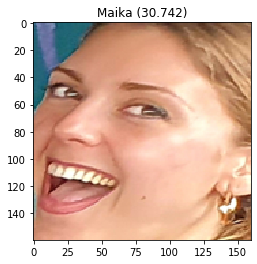

In [21]:

# AHORA VAMOS A ENCONTRAR UNA CARA ALEATORIA

# develop a classifier for the 5 Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
# load faces
data = load('faces_clase-dataset.npz') # Lo descomprime
testX_faces = data['arr_2'] # TestX
# load face embeddings
data = load('faces-clase-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# HASTA AQUÍ YA TENGO EL MODELO 
# AHORA COGE UN ELEMENTO RANDOM Y EXTRAE LA CARA
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class]) # DECODIFICA LOS DATOS
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100 # Aqui predice el valor 

predict_names = out_encoder.inverse_transform(yhat_class)
if (class_probability> 50 ):
    print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
    print('Expected: %s' % random_face_name[0])
else:
    print()
    print('Predicted: NaN - might be %s (%.3f)' % (predict_names[0], class_probability))
    print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()